In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

y_data = pd.read_csv('HGDP/hgdp/HGDP-CEPH-ID_populations.csv')
y_data = y_data.set_index('CEPH ID')
y_data.head()

,population,Geographic origin,Region,Pop7Groups,Sex,All LCLs (H1063),Unrelated (1st and 2nd degree) (H951)
CEPH ID,,,,,,,
HGDP00001,Brahui,Pakistan,Asia,Central_South_Asia,M,yes,yes
HGDP00003,Brahui,Pakistan,Asia,Central_South_Asia,M,yes,yes
HGDP00005,Brahui,Pakistan,Asia,Central_South_Asia,M,yes,yes
HGDP00007,Brahui,Pakistan,Asia,Central_South_Asia,M,yes,yes
HGDP00009,Brahui,Pakistan,Asia,Central_South_Asia,M,yes,yes


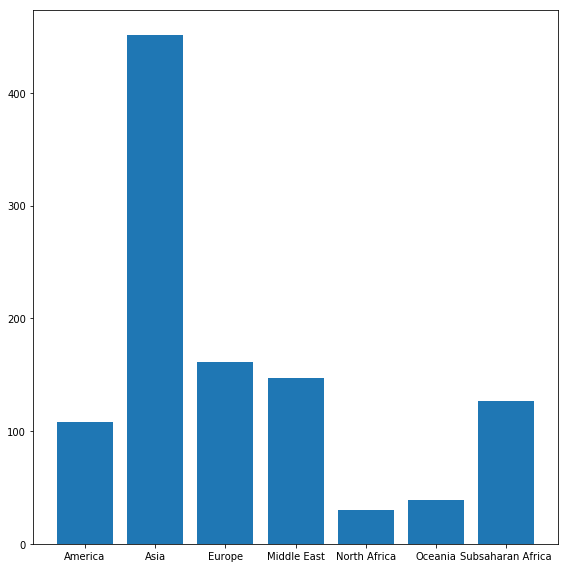

In [2]:
regions, counts = np.unique(y_data['Region'].values, return_counts=True)

f, ax = plt.subplots(figsize=(8, 8))
ax.bar(regions, counts)
plt.tight_layout()
plt.show()

# X data

In [3]:
n = 1043
col_names = []

X = pd.read_csv('data/part=0_dsize=1000.csv')
# print(X.columns)

for part in range(1, 3):
    X_part = pd.read_csv('data/part=%d_dsize=1000.csv' % part)
#     print(X_part.columns)
    X = X.merge(X_part)
    
X = X.rename({'Unnamed: 0': 'CEPH ID'}, axis='columns')
X = X.set_index('CEPH ID')
X['Region'] = pd.Series(['?' for _ in range(len(X))], index=X.index)

In [4]:
for idx in X.index:
    try:
        X['Region'] = y_data['Region']
    except KeyError:
        pass

# Visualize with PCA

In [11]:
X_array = X.values[:, :-1].astype(float)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_array)



['Subsaharan Africa' 'North Africa' 'Middle East' 'Asia' nan 'Oceania'
 'Europe' 'America']


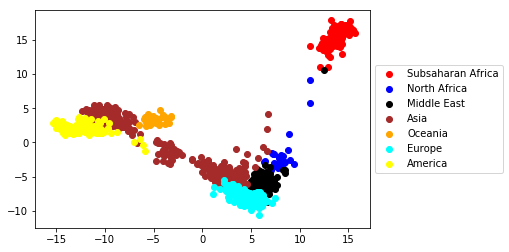

In [30]:
print(X['Region'].unique())
clrs = dict(zip(
    X['Region'].unique(), 
    ['red', 'blue', 'black', 'brown', 'green', 'orange', 'cyan', 'yellow']
))
            
f, ax = plt.subplots()
for region in X['Region'].unique():
    if str(region) == 'nan': 
        continue
    idx_reg = np.where(X['Region'] == region)
    points = X_pca[idx_reg, :].squeeze()
    xs, ys = points[:, 0], points[:, 1]
    
    ax.scatter(xs, ys, c=clrs[region], label=region)
    
ax.legend(loc='center left', bbox_to_anchor=(1., 0.5))
plt.show()

# Visualize with t-SNE

In [ ]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X_array)

f, ax = plt.subplots()
for region in X['Region'].unique():
    if str(region) == 'nan': 
        continue
    idx_reg = np.where(X['Region'] == region)
    points = X_tsne[idx_reg, :].squeeze()
    xs, ys = points[:, 0], points[:, 1]
    
    ax.scatter(xs, ys, c=clrs[region], label=region)
    
ax.legend(loc='center left', bbox_to_anchor=(1., 0.5))
plt.show()